In [1]:
import warnings
warnings.simplefilter("ignore")

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
X = pd.read_csv("C:/Users/sergi/modalidad/X.csv")
y = X['DIA']
X = X.drop('DIA',axis = 1)

In [6]:
X.columns

Index(['X', 'Y', 'OBJECTID', 'RADICADO', 'PERIODO', 'MES'], dtype='object')

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X,y, random_state=1)

In [8]:
X_train.head()

,X,Y,OBJECTID,RADICADO,PERIODO,MES
15203,-75.572639,6.287191,712201.0,1655382.0,2019.0,1.0
8471,-75.563300,6.246261,720943.0,1666003.0,2019.0,4.0
28515,-75.582006,6.215066,737777.0,1683107.0,2019.0,8.0
17013,-75.600812,6.250584,728157.0,1671804.0,2019.0,5.0
30386,-75.587381,6.234862,741253.0,1678248.0,2019.0,7.0


In [9]:
X_train.head()

,X,Y,OBJECTID,RADICADO,PERIODO,MES
15203,-75.572639,6.287191,712201.0,1655382.0,2019.0,1.0
8471,-75.563300,6.246261,720943.0,1666003.0,2019.0,4.0
28515,-75.582006,6.215066,737777.0,1683107.0,2019.0,8.0
17013,-75.600812,6.250584,728157.0,1671804.0,2019.0,5.0
30386,-75.587381,6.234862,741253.0,1678248.0,2019.0,7.0


# Cross Validation

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

scores = cross_val_score(Lasso(),X,y, cv=5, scoring='r2')
scores

array([0.69821066, 0.70055812, 0.69121681, 0.70188714, 0.72233151])

In [11]:
scores.mean()

0.7028408480199048

In [12]:
Lasso().fit(X_train,y_train).score(X_test,y_test)

0.7096004712318615

# Seleccion de modelos

In [14]:
!pip install --upgrade scikit-learn

Requirement already up-to-date: scikit-learn in c:\users\sergi\anaconda3\envs\machine-learning\lib\site-packages (0.22.2.post1)


In [15]:
from sklearn.model_selection import cross_validate

results = cross_validate(Lasso(),X,y,return_train_score=True, cv=5)
results

{'fit_time': array([0.13100886, 0.07800412, 0.06300354, 0.0860045 , 0.06100464]),
 'score_time': array([0.00199986, 0.00200081, 0.00200009, 0.00200009, 0.00200033]),
 'test_score': array([0.69821066, 0.70055812, 0.69121681, 0.70188714, 0.72233151]),
 'train_score': array([0.70646844, 0.70526056, 0.70858195, 0.7213834 , 0.71829586])}

In [16]:
test_scores = results['test_score']
train_scores = results['train_score']
print(np.mean(train_scores))
print(np.mean(test_scores))

0.7119980415230757
0.7028408480199048


El score de 0.71 no es malo, pero tampoco es muy bueno.
nuestro modelo no esta encajando tambien a los datos

# Validation Curves y Learning Curves

Vecino mas cercano

In [18]:
from sklearn.neighbors import KNeighborsRegressor

cross_validate(KNeighborsRegressor(),X,y,cv=5)

{'fit_time': array([0.10703754, 0.05700493, 0.06500387, 0.06500435, 0.06600523]),
 'score_time': array([0.03200221, 0.0340023 , 0.03300357, 0.04000354, 0.03600192]),
 'test_score': array([0.73448942, 0.68406928, 0.45299932, 0.76182544, 0.79043978])}

In [19]:
cross_validate(KNeighborsRegressor(n_neighbors=10),X,y,cv=5)

{'fit_time': array([0.06900144, 0.06500483, 0.06300378, 0.0620048 , 0.0650053 ]),
 'score_time': array([0.03800249, 0.08700609, 0.04000401, 0.04600334, 0.04300284]),
 'test_score': array([0.68664093, 0.67998384, 0.46795063, 0.76175733, 0.79491682])}

In [20]:
n = np.arange(2,50,2)
n

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48])

In [21]:
from sklearn.model_selection import validation_curve

train_scores, test_scores = validation_curve(KNeighborsRegressor(),
                                            X,
                                            y,
                                            param_name='n_neighbors',
                                            param_range=n,
                                            cv=5)

In [22]:
np.mean(train_scores, axis=1)

array([0.94611644, 0.91234003, 0.89871831, 0.88688112, 0.87703904,
       0.8707753 , 0.86395385, 0.85811111, 0.85209536, 0.84725054,
       0.84169573, 0.83745158, 0.83323204, 0.82889169, 0.82473275,
       0.82051943, 0.81628307, 0.8120951 , 0.80819095, 0.80387003,
       0.79983531, 0.79620072, 0.79265942, 0.78899486])

([<matplotlib.axis.XTick at 0x22d66e8faf0>,
 <a list of 24 Text xticklabel objects>)

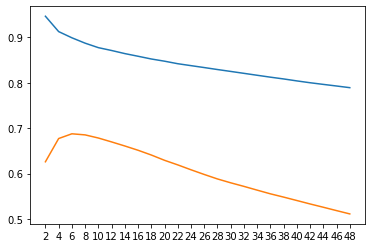

In [23]:
plt.plot(np.mean(train_scores, axis=1))
plt.plot(np.mean(test_scores, axis=1))
plt.xticks(np.arange(24),n)

El mejor parametro que se puede elijir es 7 vecinos

# Curva de aprendizaje

In [24]:
from sklearn.model_selection import learning_curve

lc = learning_curve(KNeighborsRegressor(n_neighbors=7),X,y, cv=5)

samples, train, test = lc[0],lc[1],lc[2] 

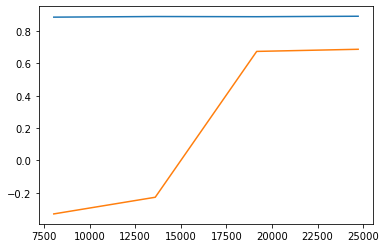

In [25]:
plt.plot(samples[1:],np.mean(train,axis=1)[1:])
plt.plot(samples[1:],np.mean(test,axis=1)[1:])


El modelo KNeighbors esta aprendiendo va creciendo pero a un no a terminado de aprender

para que termine de aprender debemos agregarle mas datos

Aprender: Cuando mejora el score en función de la cantidad de datos